In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.dates import *
import time

In [53]:
import pytimber
import pagestore
db=pytimber.LoggingDB(source='mdb')

###  Collimator settings

<IPython.core.display.Javascript object>


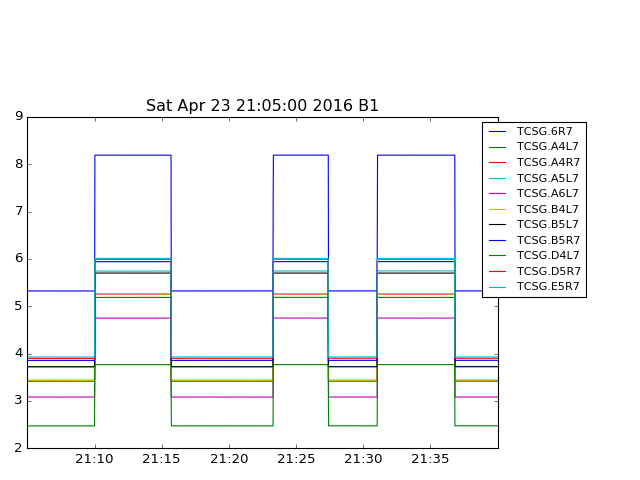

<IPython.core.display.Javascript object>


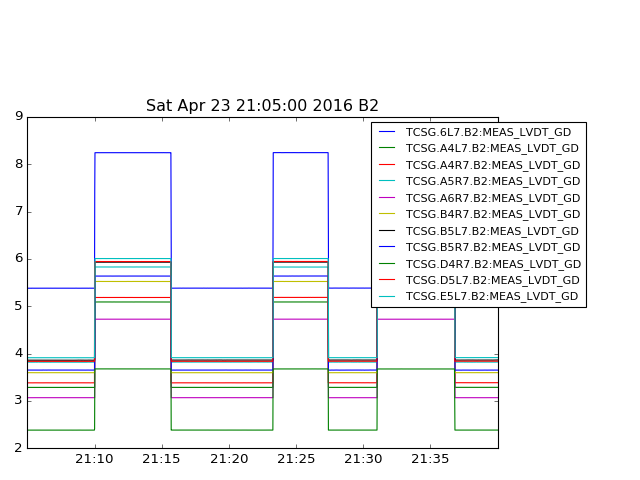

In [57]:
filln=4855

for beam in [1,2]:

    coll_list=db.search('%TCSG%7%B'+str(beam)+'%MEAS%LVDT%GD')


    plt.figure(num=beam)
    plt.clf()    

    ts1 = '2016-04-23 21:05:00' # start time
    ts2 = '2016-04-23 21:40:00' # end time

    for coll in coll_list:
        data=db.get(coll,ts1,ts2)
        tt,vv=data[coll]; tt+=2*3600
        
        plt.plot_date(epoch2num(tt),vv,'-')

    plt.legend([coll.replace('.B1:MEAS_LVDT_GD','') for coll in coll_list],fontsize=10, bbox_to_anchor=(1.2, 1))
    plt.tight_layout(rect=(0, 0, .8, .8))
    xfmt = DateFormatter('%H:%M')
    plt.gca().xaxis.set_major_formatter(xfmt)
    plt.title(time.asctime(time.gmtime(tt[0]))+' B%d'%beam)  

###  Convert into collimation tables

In [138]:
db.get('TCDQA.A4R6.B1:MEAS_LVDT_%',ts1)

{u'TCDQA.A4R6.B1:MEAS_LVDT_GD': (array([  1.46140230e+09]), array([ 0.])),
 u'TCDQA.A4R6.B1:MEAS_LVDT_GU': (array([  1.46140230e+09]), array([ 0.])),
 u'TCDQA.A4R6.B1:MEAS_LVDT_LD': (array([  1.46140230e+09]),
  array([ 4.51849842])),
 u'TCDQA.A4R6.B1:MEAS_LVDT_LU': (array([  1.46140230e+09]),
  array([ 4.56490421])),
 u'TCDQA.A4R6.B1:MEAS_LVDT_RD': (array([  1.46140230e+09]), array([ 0.])),
 u'TCDQA.A4R6.B1:MEAS_LVDT_RU': (array([  1.46140230e+09]), array([ 0.]))}

In [141]:
import numpy as np
import csv

beam=2
CollDir='/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/IRIS/LHC_IW_model/Coll_settings/'
name='LHC_ft_6.5TeV_B'+str(beam)+'_2016'


scenario_scan=[{'gap':'open',ts1 : '2016-04-23 21:13:00'},{'gap':'closed',ts1:'2016-04-23 21:20:00'}]

    
for scenario in scenario_scan:    

    comment='TCSG-6.0_6.5sigma_MD_20160423_'+scenario['gap']
    reader = csv.DictReader(open(CollDir+name+'.txt'),delimiter='\t')
    lista=[];
    for row in reader:
        newrow=row.copy();

        en=3.5e-6
        gamma=6927.
        bety=eval(row['Betay[m]'])
        betx=eval(row['Betax[m]'])
        phi=eval(row['Angle[rad]'])
        nsig=eval(row['nsig'])
        
        if 'TDI' in row['Name'] and beam==2:
            coll= db.search('TDI.4R8:MEAS_LVDT_GD')[0]
        elif 'TDI' in row['Name'] and beam==1:
            coll= db.search('TDI.4L2:MEAS_LVDT_GD')[0]
        elif 'TCDQ' in row['Name']:
            coll= db.search('TCDQA.%B'+str(beam)+':MEAS_LVDT_LD')[0]
        else:
            coll= db.search(row['Name']+'%MEAS_LVDT_GD')[0]
        
        
        
        data=db.get(coll,scenario[ts1])
        tt,fullgap=data[coll]; tt+=2*3600
        hgap_new=fullgap/2*1e-3;
        
        newrow['Halfgap[m]']='%.5f'%(hgap_new);
        sigma = np.sqrt(en/gamma*betx*np.cos(phi)**2+en/gamma*bety*np.sin(phi)**2)
        nsig = hgap_new/sigma
        newrow['nsig']='%.3f'%(nsig);
        lista.append(newrow);
        print row['Name'], coll, str(hgap_new)+' m'
    name_converted=name+'_'+comment+'.txt'
    
    with open(CollDir+name_converted, 'wb') as f:
        # Assuming that all dictionaries in the list have the same keys.
        headers = lista[0].keys()
        csv_data = [headers];
        for d in lista:
            csv_data.append([d[h] for h in headers])
        writer = csv.writer(f,delimiter='\t')
        writer.writerows(csv_data)
    print name+' converted:'
    print name_converted


TCL.4L1.B2 TCL.4L1.B2:MEAS_LVDT_GD [ 0.02499127] m
TCL.5L1.B2 TCL.5L1.B2:MEAS_LVDT_GD [ 0.02501404] m
TCL.6L1.B2 TCL.6L1.B2:MEAS_LVDT_GD [ 0.02501373] m
TCTPH.4R8.B2 TCTPH.4R8.B2:MEAS_LVDT_GD [ 0.0052784] m
TCTPV.4R8.B2 TCTPV.4R8.B2:MEAS_LVDT_GD [ 0.00552728] m
TDI.4R8.B2.1 TDI.4R8:MEAS_LVDT_GD [ 0.05490027] m
TDI.4R8.B2.1 TDI.4R8:MEAS_LVDT_GD [ 0.05490027] m
TDI.4R8.B2.1 TDI.4R8:MEAS_LVDT_GD [ 0.05490027] m
TDI.4R8.B2.2 TDI.4R8:MEAS_LVDT_GD [ 0.05490027] m
TDI.4R8.B2.2 TDI.4R8:MEAS_LVDT_GD [ 0.05490027] m
TDI.4R8.B2.3 TDI.4R8:MEAS_LVDT_GD [ 0.05490027] m
TCLIA.4L8 TCLIA.4L8:MEAS_LVDT_GD [ 0.02499916] m
TCLIB.6L8.B2 TCLIB.6L8.B2:MEAS_LVDT_GD [ 0.02489967] m
TCP.D6R7.B2 TCP.D6R7.B2:MEAS_LVDT_GD [ 0.00107128] m
TCP.C6R7.B2 TCP.C6R7.B2:MEAS_LVDT_GD [ 0.00152252] m
TCP.B6R7.B2 TCP.B6R7.B2:MEAS_LVDT_GD [ 0.00130428] m
TCSG.A6R7.B2 TCSG.A6R7.B2:MEAS_LVDT_GD [ 0.0023626] m
TCSG.B5R7.B2 TCSG.B5R7.B2:MEAS_LVDT_GD [ 0.00281839] m
TCSG.A5R7.B2 TCSG.A5R7.B2:MEAS_LVDT_GD [ 0.0029142] m
TCSG.D4R7.B2

In [117]:
ts1 = '2016-04-23 11:05:00' # start time
ts2 = '2016-04-23 21:40:00' # end time
db.getLHCFillsByTime(ts1, ts2, unixtime=True)



[{'beamModes': {u'INJPHYS': {'endTime': 1461433065.858,
    'startTime': 1461430490.26},
   u'INJPROT': {'endTime': 1461430490.259, 'startTime': 1461430104.302},
   u'SETUP': {'endTime': 1461430104.301, 'startTime': 1461429331.931}},
  'endTime': 1461433065.858,
  'fillNumber': 4854,
  'startTime': 1461427827.721},
 {'beamModes': {u'BEAMDUMP': {'endTime': 1461444857.862,
    'startTime': 1461444805.321},
   u'FLATTOP': {'endTime': 1461444805.32, 'startTime': 1461435948.579},
   u'INJPHYS': {'endTime': 1461434303.983, 'startTime': 1461433498.518},
   u'INJPROT': {'endTime': 1461433498.517, 'startTime': 1461433095.921},
   u'PRERAMP': {'endTime': 1461434657.973, 'startTime': 1461434303.984},
   u'RAMP': {'endTime': 1461435948.578, 'startTime': 1461434657.974},
   u'RAMPDOWN': {'endTime': 1461445172.567, 'startTime': 1461444857.863}},
  'endTime': 1461445172.567,
  'fillNumber': 4855,
  'startTime': 1461433065.859}]

In [17]:
db.search('%TCD%%B'+str(beam)+'%MEAS%LVDT%GD')

[u'TCDQA.A4L6.B2:MEAS_LVDT_GD']